In [ ]:
#Q1 Build a Classification Model with Spark with a dataset of your choice
#dataset :- I'll use the classic Iris dataset for this demonstration

# Step 1: Install PySpark (only needed in Colab or fresh environment)
!pip install pyspark

# Step 2: Import required libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pandas as pd
import os

# Step 3: Start Spark session
spark = SparkSession.builder.appName("IrisClassification").getOrCreate()

# Step 4: Show current working directory (for checking CSV file location)
print("Current Directory:", os.getcwd())

# Step 5: Create and save the iris dataset as CSV in /content
iris_data = {
    "sepal_length": [5.1, 4.9, 4.7, 6.0, 6.4, 5.9],
    "sepal_width": [3.5, 3.0, 3.2, 2.2, 3.2, 3.0],
    "petal_length": [1.4, 1.4, 1.3, 5.0, 4.5, 5.1],
    "petal_width": [0.2, 0.2, 0.2, 1.5, 1.5, 1.8],
    "species": ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-versicolor", "Iris-virginica"]
}

# Convert to DataFrame
df = pd.DataFrame(iris_data)

# Save to CSV
df.to_csv("iris.csv", index=False)

print("iris.csv created successfully.")

# Step 6: Load the dataset (make sure it's in the current directory)
data = spark.read.option("header", True).option("inferSchema", True).csv("iris.csv")

# Step 7: Display the data and schema
data.show(5)
data.printSchema()

# Step 8: String Indexing for species (label encoding)
indexer = StringIndexer(inputCol="species", outputCol="label")
data = indexer.fit(data).transform(data)

# Step 9: Assemble features into a single vector column
assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol="features"
)
data = assembler.transform(data)

# Step 10: Select final data with features and label
final_data = data.select("features", "label")

# Step 11: Split into training and test sets
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

# Step 12: Train a Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
model = dt.fit(train_data)

# Step 13: Make predictions on the test set
predictions = model.transform(test_data)
predictions.select("features", "label", "prediction").show(5)

# Step 14: Evaluate the model with accuracy metric
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy =", accuracy)

# Step 15: Print the Decision Tree model
print("\nDecision Tree Model:\n")
print(model.toDebugString)

# Step 16: Stop the Spark session
spark.stop()


Current Directory: /content
iris.csv created successfully.
+------------+-----------+------------+-----------+---------------+
|sepal_length|sepal_width|petal_length|petal_width|        species|
+------------+-----------+------------+-----------+---------------+
|         5.1|        3.5|         1.4|        0.2|    Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|    Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|    Iris-setosa|
|         6.0|        2.2|         5.0|        1.5|Iris-versicolor|
|         6.4|        3.2|         4.5|        1.5|Iris-versicolor|
+------------+-----------+------------+-----------+---------------+
only showing top 5 rows

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)

+-----------------+-----+----------+
|         features|label|prediction|
+----------

Current Directory: /content
iris.csv created successfully.
+------------+-----------+------------+-----------+---------------+
|sepal_length|sepal_width|petal_length|petal_width|        species|
+------------+-----------+------------+-----------+---------------+
|         5.1|        3.5|         1.4|        0.2|    Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|    Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|    Iris-setosa|
|         6.0|        2.2|         5.0|        1.5|Iris-versicolor|
|         6.4|        3.2|         4.5|        1.5|Iris-versicolor|
+------------+-----------+------------+-----------+---------------+
only showing top 5 rows

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)

+------------+-----------+------------+-----------+---------------+----------+
|sepal

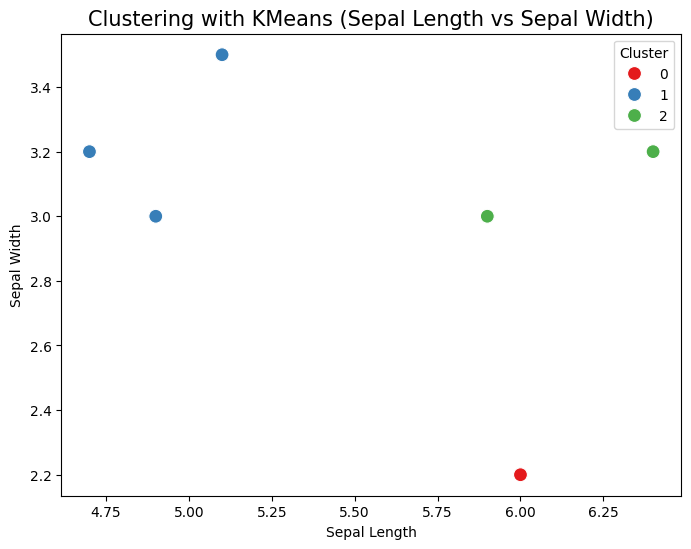

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Silhouette Score: 0.5404495155899104


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


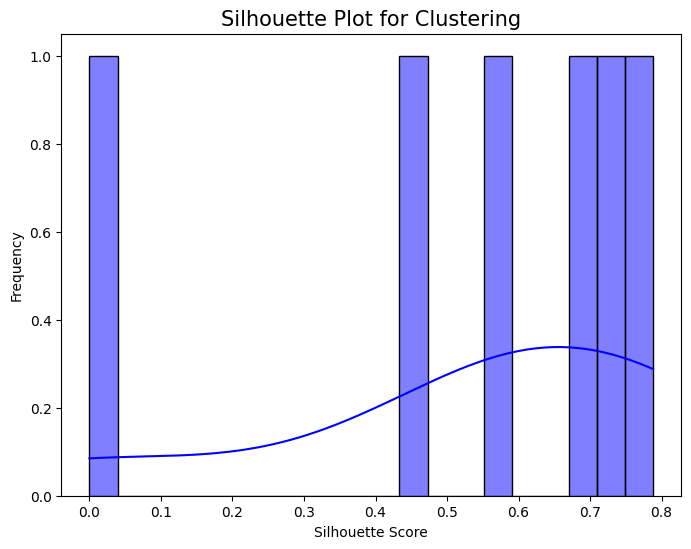

In [ ]:
#Q2 Build a Clustering Model with Spark with a dataset of your choice.
#I'll use the classic Iris dataset

# Step 1: Install required packages
!pip install pyspark
!pip install matplotlib seaborn

# Step 2: Import required libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 3: Start Spark session
spark = SparkSession.builder.appName("IrisClustering").getOrCreate()

# Step 4: Show current working directory (for checking CSV file location)
print("Current Directory:", os.getcwd())

# Step 5: Create and save the iris dataset as CSV in /content
iris_data = {
    "sepal_length": [5.1, 4.9, 4.7, 6.0, 6.4, 5.9],
    "sepal_width": [3.5, 3.0, 3.2, 2.2, 3.2, 3.0],
    "petal_length": [1.4, 1.4, 1.3, 5.0, 4.5, 5.1],
    "petal_width": [0.2, 0.2, 0.2, 1.5, 1.5, 1.8],
    "species": ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-versicolor", "Iris-virginica"]
}

# Convert to DataFrame
df = pd.DataFrame(iris_data)

# Save to CSV
df.to_csv("iris.csv", index=False)

print("iris.csv created successfully.")

# Step 6: Load the dataset (make sure it's in the current directory)
data = spark.read.option("header", True).option("inferSchema", True).csv("iris.csv")

# Step 7: Display the data and schema
data.show(5)
data.printSchema()

# Step 8: Assemble features into a single vector column
assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol="features"
)
data = assembler.transform(data)

# Step 9: Perform KMeans Clustering (we'll assume there are 3 clusters, as we know the dataset has 3 species)
kmeans = KMeans().setK(3).setSeed(1)  # 3 clusters, seed for reproducibility
model = kmeans.fit(data)

# Step 10: Make predictions (assign clusters to data points)
predictions = model.transform(data)

# Step 11: Show predictions (each data point is assigned to a cluster)
predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "species", "prediction").show()

# Step 12: Evaluate the model (using ClusteringEvaluator)
evaluator = ClusteringEvaluator()

# Evaluate with the silhouette score (higher values indicate better clustering)
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared euclidean distance = {silhouette}")

# Step 13: Show the centers of the clusters
print("\nCluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

# Step 14: Visualizing Clusters with Scatter Plot
# Convert predictions to pandas for easy plotting
predictions_pd = predictions.select("sepal_length", "sepal_width", "prediction").toPandas()

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=predictions_pd, x="sepal_length", y="sepal_width", hue="prediction", palette="Set1", s=100)
plt.title('Clustering with KMeans (Sepal Length vs Sepal Width)', fontsize=15)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title="Cluster")
plt.show()

# Step 15: Silhouette Plot for Clustering (to visualize clustering quality)
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Convert features to a numpy array for silhouette analysis
features = predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width").toPandas()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Silhouette score
silhouette_avg = silhouette_score(features_scaled, predictions.select("prediction").toPandas())
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate the silhouette scores for each point
silhouette_values = silhouette_samples(features_scaled, predictions.select("prediction").toPandas())

# Plot silhouette scores
plt.figure(figsize=(8, 6))
sns.histplot(silhouette_values, kde=True, color="blue", bins=20)
plt.title("Silhouette Plot for Clustering", fontsize=15)
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()

# Step 16: Stop the Spark session
spark.stop()


In [ ]:
#Q3 Build a Recommendation Engine with Spark with a dataset of your choice
#I'll use the MovieLens dataset

# Step 1: Install PySpark (only needed in Colab or fresh environment)
!pip install pyspark
!pip install matplotlib seaborn

# Step 2: Import required libraries
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
import pandas as pd
import os

# Step 3: Start Spark session
spark = SparkSession.builder.appName("MovieLensRecommendation").getOrCreate()

# Step 4: Load the MovieLens dataset (this can be downloaded from the MovieLens website)
# For this example, I'm generating a small subset of the MovieLens dataset.

# Create a small MovieLens dataset (userId, movieId, rating)
movie_data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5],
    'movieId': [1, 2, 3, 1, 2, 1, 3, 2, 3, 1],
    'rating': [4, 5, 3, 2, 3, 5, 1, 4, 2, 5]
}

# Convert to DataFrame
df = pd.DataFrame(movie_data)

# Save to CSV
df.to_csv("movielens.csv", index=False)

print("MovieLens dataset (small) created successfully.")

# Step 5: Load the dataset into Spark
data = spark.read.option("header", True).option("inferSchema", True).csv("movielens.csv")

# Step 6: Show data and schema
data.show(5)
data.printSchema()

# Step 7: Train a Collaborative Filtering model using ALS
# ALS requires a column for userID, itemID, and ratings.
als = ALS(maxIter=10, regParam=0.1, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(data)

# Step 8: Make predictions (this will give predicted ratings for user-movie pairs)
predictions = model.transform(data)

# Step 9: Show some predictions (userId, movieId, rating, and predicted rating)
predictions.select("userId", "movieId", "rating", "prediction").show()

# Step 10: Evaluate the model using RMSE (Root Mean Squared Error)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) = {rmse}")

# Step 11: Recommend top 3 movies for a specific user (e.g., userId = 1)
user_recommendations = model.recommendForUserSubset(data.filter(col("userId") == 1), 3)
user_recommendations.show()

# Step 12: Recommend top 3 users for a specific movie (e.g., movieId = 2)
movie_recommendations = model.recommendForItemSubset(data.filter(col("movieId") == 2), 3)
movie_recommendations.show()

# Step 13: Stop the Spark session
spark.stop()


MovieLens dataset (small) created successfully.
+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      1|     4|
|     1|      2|     5|
|     1|      3|     3|
|     2|      1|     2|
|     2|      2|     3|
+------+-------+------+
only showing top 5 rows

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: integer (nullable = true)

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|     1|      1|     4|  3.972424|
|     1|      2|     5| 4.9683695|
|     1|      3|     3| 2.7488806|
|     3|      1|     5| 4.8385305|
|     3|      3|     1| 1.1161274|
|     5|      1|     5| 4.9399643|
|     4|      2|     4|  3.836702|
|     4|      3|     2| 2.1171274|
|     2|      1|     2| 2.0089645|
|     2|      2|     3| 2.9184003|
+------+-------+------+----------+

Root Mean Squared Error (RMSE) = 0.1245423673435366
+------+--------------------+
|userId|     r